In [11]:
from pathlib import Path
import numpy as np
from PIL import Image
import seaborn as sns
from collections import defaultdict

(1702, 2)


<AxesSubplot:>

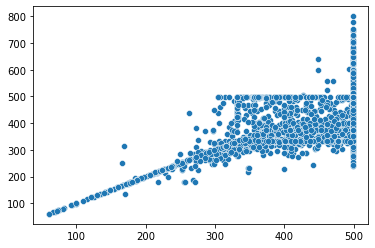

In [4]:
rootdir = Path("crops_square/bird_dataset")

sizes = np.empty((0, 2))
for imfn in rootdir.rglob('*.jpg'):
    if imfn.name.split('.')[-2] == '00' or True:
        im = Image.open(imfn)
        w, h = im.size
        sizes = np.concatenate((sizes, [[w, h]]), axis=0)
        if w < 50 or h < 50:
            print(imfn)
print(sizes.shape)
sns.scatterplot(x=sizes[:, 0], y=sizes[:, 1])

(1082, 2)
('014.Indigo_Bunting', 57)
('023.Brandt_Cormorant', 53)
('013.Bobolink', 58)
('020.Yellow_breasted_Chat', 51)
('016.Painted_Bunting', 52)
('015.Lazuli_Bunting', 54)
('034.Gray_crowned_Rosy_Finch', 51)
('012.Yellow_headed_Blackbird', 54)
('030.Fish_Crow', 54)
('021.Eastern_Towhee', 54)
('009.Brewer_Blackbird', 55)
('004.Groove_billed_Ani', 58)
('019.Gray_Catbird', 54)
('033.Yellow_billed_Cuckoo', 55)
('011.Rusty_Blackbird', 57)
('026.Bronzed_Cowbird', 52)
('031.Black_billed_Cuckoo', 55)
('010.Red_winged_Blackbird', 53)
('028.Brown_Creeper', 52)
('029.American_Crow', 53)


<AxesSubplot:>

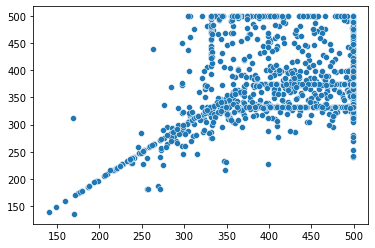

In [18]:
rootdir = Path("crops_square/bird_dataset/train_images")

classes = defaultdict(int)

sizes = np.empty((0, 2))
for imfn in rootdir.rglob('*.jpg'):
    if imfn.name.split('.')[-2] == '00' or True:
        classes[imfn.parent.name] += 1
        im = Image.open(imfn)
        w, h = im.size
        sizes = np.concatenate((sizes, [[w, h]]), axis=0)
        if w < 50 or h < 50:
            print(imfn)
print(sizes.shape)
print(*classes.items(), sep='\n')
sns.scatterplot(x=sizes[:, 0], y=sizes[:, 1])

(103, 2)
('014.Indigo_Bunting', 3)
('023.Brandt_Cormorant', 6)
('013.Bobolink', 2)
('020.Yellow_breasted_Chat', 8)
('016.Painted_Bunting', 6)
('015.Lazuli_Bunting', 4)
('034.Gray_crowned_Rosy_Finch', 8)
('012.Yellow_headed_Blackbird', 2)
('030.Fish_Crow', 6)
('021.Eastern_Towhee', 6)
('009.Brewer_Blackbird', 4)
('004.Groove_billed_Ani', 2)
('019.Gray_Catbird', 5)
('033.Yellow_billed_Cuckoo', 4)
('011.Rusty_Blackbird', 3)
('026.Bronzed_Cowbird', 8)
('031.Black_billed_Cuckoo', 5)
('010.Red_winged_Blackbird', 7)
('028.Brown_Creeper', 7)
('029.American_Crow', 7)


<AxesSubplot:>

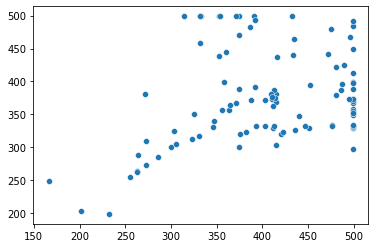

In [19]:
rootdir = Path("crops_square/bird_dataset/val_images")

classes = defaultdict(int)

sizes = np.empty((0, 2))
for imfn in rootdir.rglob('*.jpg'):
    if imfn.name.split('.')[-2] == '00' or True:
        classes[imfn.parent.name] += 1
        im = Image.open(imfn)
        w, h = im.size
        sizes = np.concatenate((sizes, [[w, h]]), axis=0)
        if w < 50 or h < 50:
            print(imfn)
print(sizes.shape)
print(*classes.items(), sep='\n')
sns.scatterplot(x=sizes[:, 0], y=sizes[:, 1])

(517, 2)
('mistery_category', 517)


<AxesSubplot:>

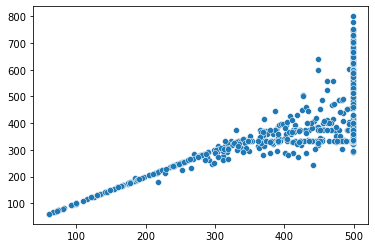

In [20]:
rootdir = Path("crops_square/bird_dataset/test_images")

classes = defaultdict(int)

sizes = np.empty((0, 2))
for imfn in rootdir.rglob('*.jpg'):
    if imfn.name.split('.')[-2] == '00' or True:
        classes[imfn.parent.name] += 1
        im = Image.open(imfn)
        w, h = im.size
        sizes = np.concatenate((sizes, [[w, h]]), axis=0)
        if w < 50 or h < 50:
            print(imfn)
print(sizes.shape)
print(*classes.items(), sep='\n')
sns.scatterplot(x=sizes[:, 0], y=sizes[:, 1])

In [1]:
from torchvision import models

In [2]:
def n_params(model):
    return sum(p.numel() for p in model.parameters())

In [4]:
m_list = [
    "vgg11",
    "vgg16",
    "vgg19",
    "resnet18",
    "resnet34",
    "resnet50",
    "resnet101",
    "resnet152",
    "squeezenet1_0",
    "squeezenet1_1",
    "densenet121",
    "densenet169",
    "densenet161",
    "densenet201",
    "inception_v3",
    "googlenet",
]

In [15]:
model_sizes = {}
for m_name in m_list:
    m = models.__dict__[m_name]()
    model_sizes[m_name] = n_params(m)
    print(m_name, f'{model_sizes[m_name]:e}')

vgg11 1.328633e+08
vgg16 1.383575e+08
vgg19 1.436672e+08
resnet18 1.168951e+07
resnet34 2.179767e+07
resnet50 2.555703e+07
resnet101 4.454916e+07
resnet152 6.019281e+07
squeezenet1_0 1.248424e+06
squeezenet1_1 1.235496e+06
densenet121 7.978856e+06
densenet169 1.414948e+07
densenet161 2.868100e+07
densenet201 2.001393e+07
inception_v3 2.716126e+07
googlenet 1.300489e+07


In [18]:
model_sizes = {}
for m_name in m_list:
    m = models.__dict__[m_name]()
    model_sizes[m_name] = n_params(m)
    print(m_name, list(m.children())[-1])

vgg11 Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
vgg16 Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
vgg19 Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
r

In [19]:
models.squeezenet1_1()

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): MaxPool2d

In [20]:
models.resnet18()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  